In [1]:
import numpy as np
import matplotlib.pyplot as plt
print(np.version.version)

1.21.4


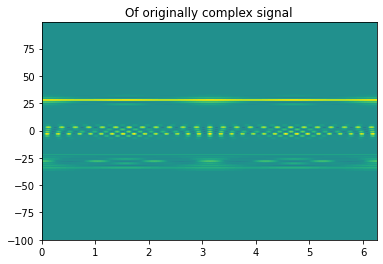

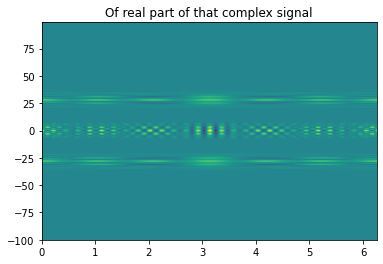

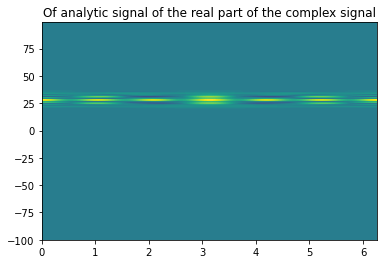

In [2]:
from scipy.signal import hilbert

# Domain parameters
L, size = 2*np.pi, 200
modes = size//2 + 1
dx = L / size
x = np.linspace(0, L-dx, num=size)
k = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(size, d=dx))
# k = 2.0*np.pi/L * np.arange(1-modes, modes)
pad_width = size

# Construct two sorts of signals
modes = np.arange(10, 20)
f_cmpx = np.array([np.exp((-1)**mode*1j*mode*x + 2*np.pi*np.random.random(1)) 
                   for mode in modes]).sum(axis=0)
f_real = np.real(f_cmpx)
f_anly = hilbert(f_real)

def fft_wig(y):
    spec = np.fft.fftshift(np.fft.fft(y, norm='forward'))
    fourier_coefficients = spec[None, :]*np.exp(1j*k[None, :]*x[:, None])
    mod_spec_1 = np.conj(fourier_coefficients)
    mod_spec_2 = fourier_coefficients
    ifft1 = np.fft.ifft(np.fft.fftshift(mod_spec_1, axes=1), axis=1, norm='forward')
    ifft2 = np.fft.ifft(np.fft.fftshift(mod_spec_2, axes=1), axis=1, norm='forward')
    prod = np.multiply(ifft1, ifft2)
    return np.fft.fftshift(np.fft.fft(prod, axis=1, norm='forward'))


X, K = np.meshgrid(x, k, indexing='ij')

def plot_wig(f):
    wig = fft_wig(f)
    wig_r = np.real(wig)
    cb = np.linspace(np.amin(wig_r), np.amax(wig_r), num=100)
        
    plt.figure()
    plt.contourf(X, K, wig_r, cb)

plot_wig(f_cmpx)
plt.title('Of originally complex signal')

plot_wig(f_real)
plt.title('Of real part of that complex signal')

plot_wig(f_anly)
plt.title('Of analytic signal of the real part of the complex signal')

plt.show()